In [1]:
def BiteKite(n):
    for i in range(1,n+1,1):
        if (i%3 == 0):
            print("Bite",end="")
        if (i%5 == 0):
            print("Kite",end= " ")
        if not ((i%3 == 0) or (i%5 == 0)):
            print(i,end="")
        print()
            

In [2]:
BiteKite(15)

1
2
Bite
4
Kite 
Bite
7
8
Bite
Kite 
11
Bite
13
14
BiteKite 


In [153]:
import pandas as pd
import matplotlib.pyplot as plt

In [159]:
df = pd.read_csv("KA_COVID.csv",header=0)

In [160]:
df["TotalConfirmed"] = df["Confirmed"].cumsum()
df["TotalDeceased"] = df["Deceased"].cumsum()
df["TotalRecovered"] = df["Recovered"].cumsum()
df["RatioRecovered"] = df["Recovered"]/df["Confirmed"]


df = df.drop(0)
df.reset_index(drop=True,inplace=True)
a = pd.to_datetime(df["Date"])
month = a.map(lambda x: x.month_name()[:3] + "'" + str(x.year)[-2:]).values
day = a.map(lambda x: x.day).values
mask = [day == 1][0]

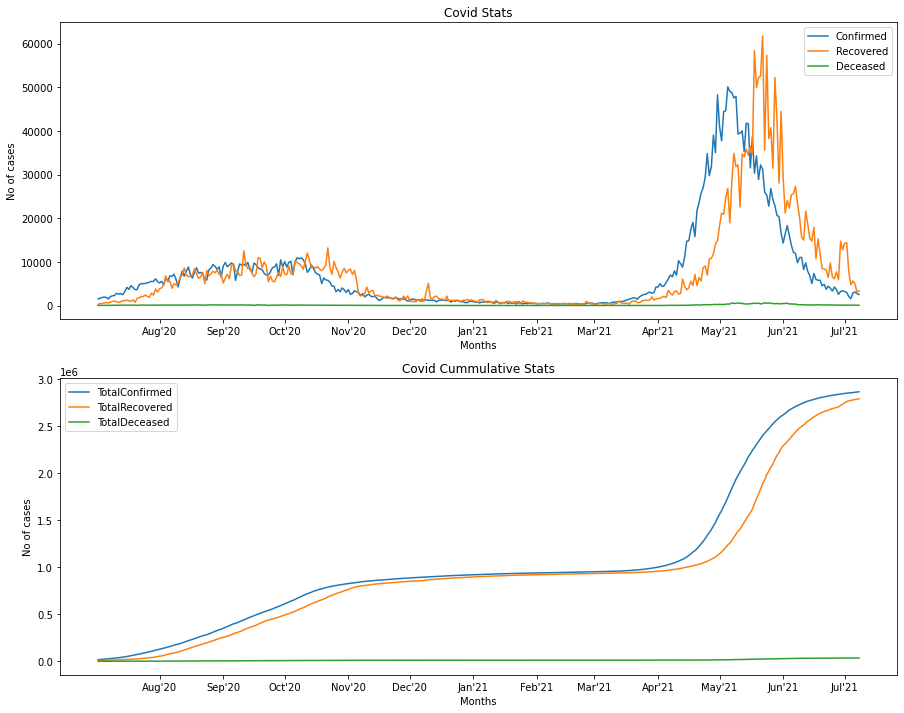

In [156]:
fig,ax = plt.subplots(2,1,figsize=(15,12))
ax[0].plot(df["Confirmed"], label = "Confirmed")
ax[0].plot(df["Recovered"], label = "Recovered")
ax[0].plot(df["Deceased"], label = "Deceased")
ax[0].legend()
ax[0].set_xticks(ticks = df.index.values[mask])
ax[0].set_xticklabels(labels = month[mask])
ax[0].set_xlabel("Months")
ax[0].set_ylabel("No of cases")
ax[0].set_title("Covid Stats")

ax[1].plot(df["TotalConfirmed"], label = "TotalConfirmed")
ax[1].plot(df["TotalRecovered"], label = "TotalRecovered")
ax[1].plot(df["TotalDeceased"], label = "TotalDeceased")
ax[1].legend()
ax[1].set_xticks(ticks = df.index.values[mask])
ax[1].set_xticklabels(labels = month[mask])
ax[1].set_xlabel("Months")
ax[1].set_ylabel("No of cases")
ax[1].set_title("Covid Stats")
ax[1].set_title("Covid Cummulative Stats")
plt.savefig("output.pdf",dpi=300)

In [185]:
index = df["Confirmed"].argmax()

df["Confirmed"][index]
df["RatioRecovered"].mean()